# Exploratory analysis

In [1]:
## Import statements:
import pandas as pd
import matplotlib.pyplot as plt

## Plot style:
plt.style.use('seaborn')

In [2]:
## Change the way big numbers are presented:
pd.options.display.float_format = '{:20,.2f}'.format

## Extracting the data from excel

In [3]:
df = pd.read_excel('../datasets/AdventureWorks.xlsx')

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


## First look into the dataset

In [5]:
## Size
print("The dataset has {} rows (or entries) and  {} columns (or features).".format(*df.shape))

The dataset has 904 rows (or entries) and  16 columns (or features).


In [5]:
## Types of each column
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
## Total sales value
df['Valor Venda'].sum()

5984606.1426

## Answering some questions

### What is the total profit?

Clearly we have to find the total **cost** first and then discount it from the value of sales: 

In [13]:
## Defining a new column with the total cost
df['Custo'] = df['Custo Unitário'] * df['Quantidade']

## Sum of the total cost
print('Sum of the total cost = ${:.2f}'.format(df.Custo.sum().round(2)))

df.head(1) # verifying updates

Sum of the total cost = $2486783.05


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [12]:
## Definging a new column with the profit (Lucro) information
df['Lucro'] = df['Valor Venda'] - df['Custo']
print('Total of profit = ${:.2f}'.format(df.Lucro.sum().round(2)))
df.head(1)

Total of profit = $3497823.09


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


### What is the average delivering time?

Is there any notable difference between the delivering time of each brand?

In [15]:
## Delivering time in days:
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']
df['Tempo Envio'] = df['Tempo Envio'].dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [16]:
## Verifying the data type of "Tempo Envio" (delivering time)
df['Tempo Envio'].dtype

dtype('int64')

In [27]:
print('\n***\t Mean delivering time  \t   ***')
print(df.groupby("Marca")['Tempo Envio'].mean())


***	 Mean delivering time  	   ***
Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64


### How many null values we have?

In [25]:
## Counting null entries:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

### What were the profit achieved by each brand?

And how it changed with time, comparing the performance by year.

In [28]:
df.groupby([df['Data Venda'].dt.year, "Marca"]).Lucro.sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [30]:
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"]).Lucro.sum().reset_index()

lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Which product is our best seller?

In [31]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

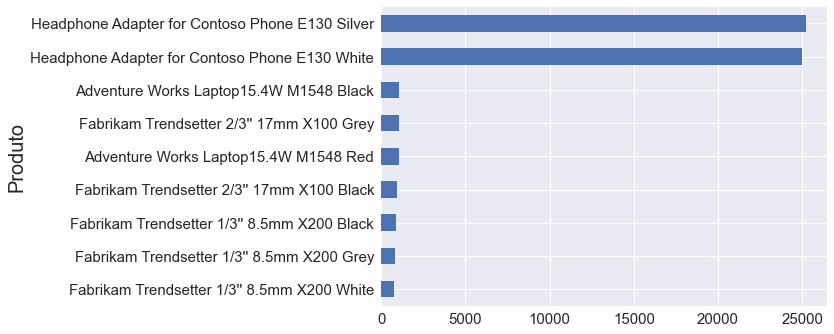

In [57]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(fontsize=(15))
plt.ylabel('Produto', fontsize=20)

### Which year was better in terms of profit?

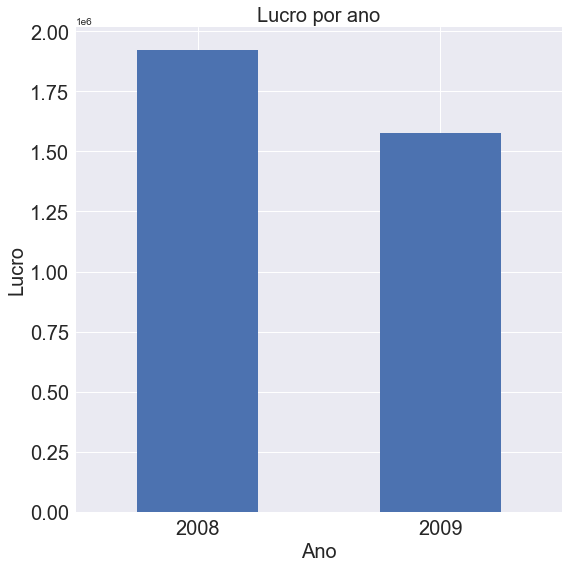

In [43]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(fontsize=20, figsize=(8,8))
plt.title('Lucro por ano', fontsize=20)
plt.ylabel('Lucro', fontsize=20)
plt.xlabel('Ano', fontsize=20)
plt.xticks(rotation='horizontal')
plt.tight_layout();

In [37]:
print("*** \tProfit by year   ***")
print(df.groupby(df['Data Venda'].dt.year)['Lucro'].sum())

*** 	Profit by year   ***
Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64


### How the sales evolved through time in 2009?

In [39]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
771,2009-09-20,2009-09-28,199,2497,18994,200909205CS907,5.09,9.99,288,287.71,"2,589.41",Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,"1,465.92","1,123.49",8
535,2009-01-15,2009-01-20,306,366,19061,200901153CS736,348.58,758.00,4,606.40,"2,425.60",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"1,394.32","1,031.28",5
387,2009-11-04,2009-11-09,199,1203,19011,200911044CS926,324.69,980.00,9,"1,764.00","7,056.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"2,922.21","4,133.79",5
516,2009-03-13,2009-03-25,307,366,19118,200903133CS708,348.58,758.00,10,"1,516.00","6,064.00",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"3,485.80","2,578.20",12
29,2009-09-22,2009-10-01,307,1178,19135,200909224CS725,330.66,998.00,6,0.00,"5,988.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,983.96","4,004.04",9


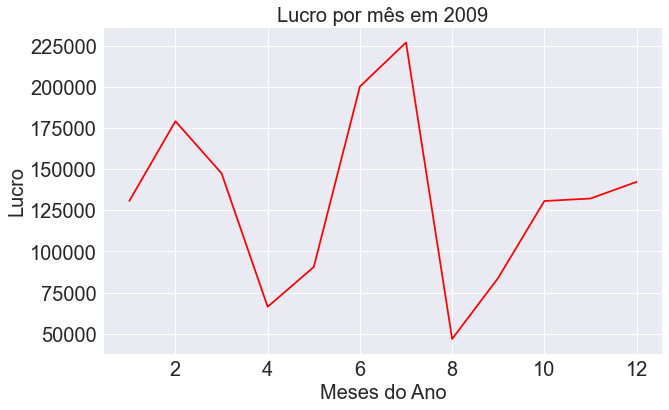

In [50]:
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot(figsize=(10,6), fontsize=20, color='r');
plt.title("Lucro por mês em 2009", fontsize=20)
plt.ylabel("Lucro", fontsize=20)
plt.xlabel("Meses do Ano", fontsize=20);

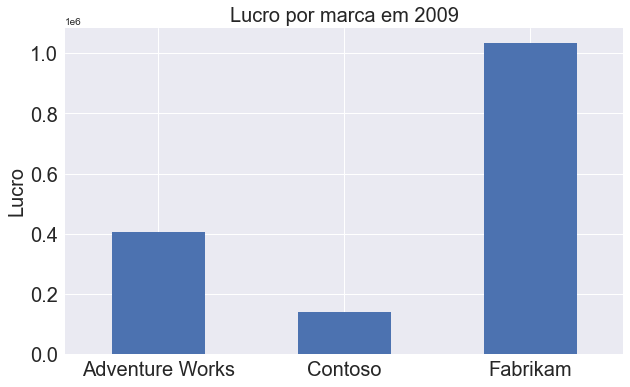

In [49]:
df_2009.groupby(df['Marca'])['Lucro'].sum().plot.bar(fontsize=20, figsize=(10,6));
plt.title("Lucro por marca em 2009", fontsize=20)
plt.xticks(rotation='horizontal')
plt.ylabel("Lucro", fontsize=20)
plt.xlabel("");

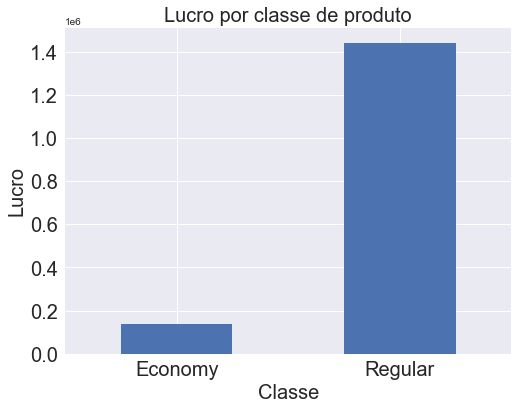

In [53]:
df_2009.groupby(df['Classe'])['Lucro'].sum().plot.bar(fontsize=20,figsize=(8,6));
plt.title("Lucro por classe de produto", fontsize=20)
plt.xticks(rotation='horizontal')
plt.ylabel("Lucro", fontsize=20)
plt.xlabel("Classe", fontsize=20);

### Outlier analysis

In [46]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

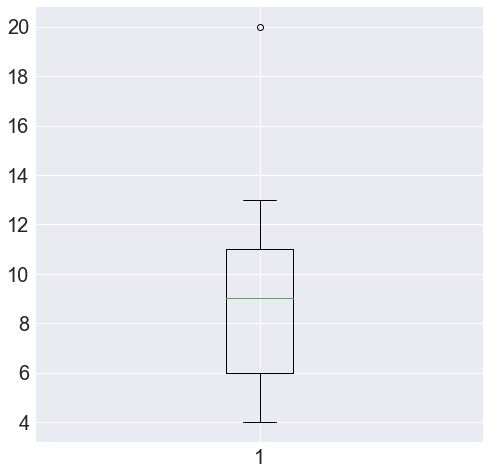

In [55]:
plt.figure(figsize=(8,8))
plt.tick_params(labelsize=20)
plt.boxplot(df['Tempo Envio']);

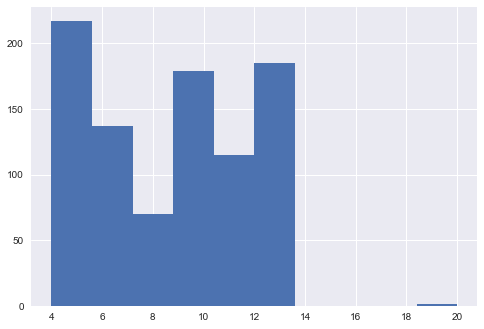

In [52]:
plt.hist(df['Tempo Envio']);

In [54]:
df['Tempo Envio'].min()

4

In [55]:
df['Tempo Envio'].max()

20

In [56]:
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [58]:
# df.to_csv('../datasets/AdventureWorks_new.csv', index=False) # To save the new dataset, uncomment this line 